<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Ago_25_26/Ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Hacer una función para n órdenes de polinomios.
2.Hacer una gráfica de orden vs costo (n vs l)
3.Hacer una gráfica de costo de cross validación contra el orden del polinomio

**Crear una función que ajuste los pesos para un modelo dado como argumento el grado del polinomio ajustado. La función debe devolver el costo total en el conjunto de datos dado como entrenamiento.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [3]:
x = data[0]
y = data[1]

In [265]:
def w_func(x,y,n):
  t = y
  X = np.array([np.power(x,i) for i in range(n+1)]).T
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_tt = np.matmul(X.T,t)
  w = np.matmul(invX_tX, X_tt)
  return w

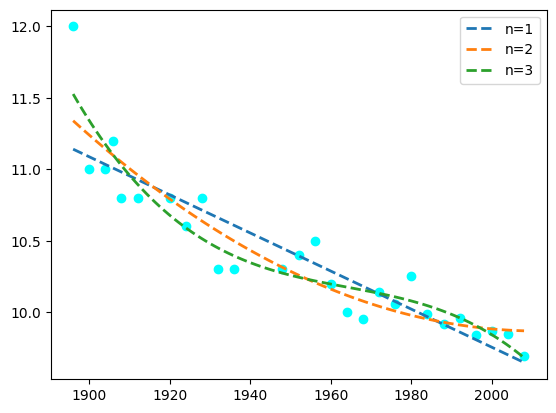

In [318]:
plt.scatter(x,y, color = 'cyan')
x_test = np.linspace(min(x), max(x), 100)
w_test3 = w_func(x,y,3)
w_test2 = w_func(x,y,2)
w_test4 = w_func(x,y,4)
w_test1 = w_func(x,y,1)
f_test1 = w_test1[0]+w_test1[1]*x_test
f_test2 = w_test2[0]+w_test2[1]*x_test+w_test2[2]*x_test**2
f_test3 = w_test3[0]+w_test3[1]*x_test+x_test**2*w_test3[2]+x_test**3*w_test3[3]
plt.plot(x_test, f_test1, linewidth = 2, linestyle = '--', label = 'n=1')
plt.plot(x_test, f_test2, linewidth = 2, linestyle = '--', label = 'n=2')
plt.plot(x_test, f_test3, linewidth = 2, linestyle = '--', label = 'n=3')
plt.legend()

In [291]:
def L1(x,y,w):
  X = np.array([np.power(x,i) for i in range(2)]).T
  Xw = np.matmul(X,w)
  t_Xw = y-Xw
  L = (1/100)*np.matmul(t_Xw.T,t_Xw)
  return L
def L2(x,y,w):
  X = np.array([np.power(x,i) for i in range(3)]).T
  Xw = np.matmul(X,w)
  t_Xw = y-Xw
  L = (1/100)*np.matmul(t_Xw.T,t_Xw)
  return L
def L3(x,y,w):
  X = np.array([np.power(x,i) for i in range(4)]).T
  Xw = np.matmul(X,w)
  t_Xw = y-Xw
  L = (1/100)*np.matmul(t_Xw.T,t_Xw)
  return L

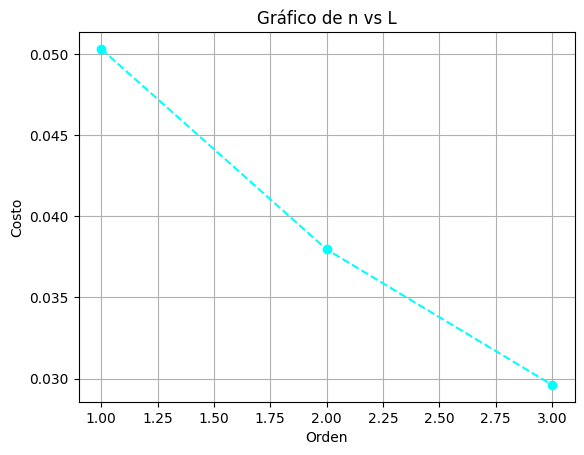

In [322]:
X = np.array([np.power(x,i) for i in range(2)]).T
Xw = np.matmul(X,w_test1)
t_Xw = y-Xw
L1 = (1/27)*np.matmul(t_Xw.T,t_Xw)
L1
X = np.array([np.power(x,i) for i in range(3)]).T
Xw = np.matmul(X,w_test2)
t_Xw = y-Xw
L2 = (1/27)*np.matmul(t_Xw.T,t_Xw)
L2
X = np.array([np.power(x,i) for i in range(4)]).T
Xw = np.matmul(X,w_test3)
t_Xw = y-Xw
L3 = (1/27)*np.matmul(t_Xw.T,t_Xw)
L3
Ls = [L1,L2,L3]
ns = [1,2,3]
plt.plot(ns, Ls, '--o', color = 'cyan')
plt.ylabel('Costo')
plt.xlabel('Orden')
plt.title('Gráfico de n vs L')
plt.grid()

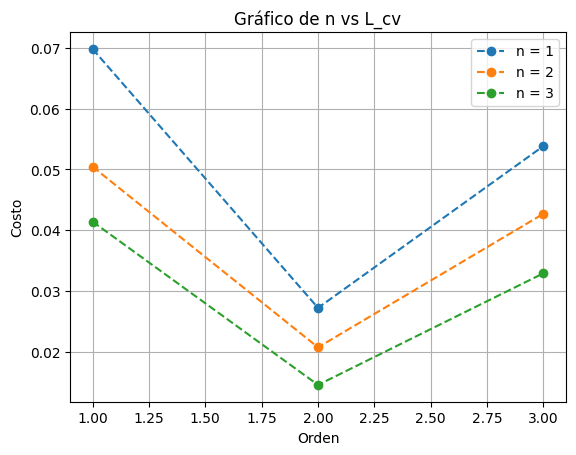

In [346]:
#Tomaré el conjunto de validación como el conjunto completo -9
x_1 = x[0:18:1]
x_2 = x[9:27:1]
x_3_3_1 = x[0:9:1]
x_3_3_2 = x[18:27:1]
x_3 = np.hstack([x_3_3_1 ,x_3_3_2])
y_1 = y[0:18:1]
y_2 = y[9:27:1]
y_3_1 = y[0:9:1]
y_3_2 = y[18:27:1]
y_3 = np.hstack([y_3_1,y_3_2])
X = np.array([np.power(x_1,i) for i in range(2)]).T
Xw = np.matmul(X,w_test1)
t_Xw = y_1-Xw
L_1_1 = (1/18)*np.matmul(t_Xw.T,t_Xw)
X = np.array([np.power(x_2,i) for i in range(2)]).T
Xw = np.matmul(X,w_test1)
t_Xw = y_2-Xw
L_1_2 = (1/18)*np.matmul(t_Xw.T,t_Xw)
X = np.array([np.power(x_3,i) for i in range(2)]).T
Xw = np.matmul(X,w_test1)
t_Xw = y_3-Xw
L_1_3 = (1/18)*np.matmul(t_Xw.T,t_Xw)
Ls = [L_1_1,L_1_2,L_1_3]

X = np.array([np.power(x_1,i) for i in range(3)]).T
Xw = np.matmul(X,w_test2)
t_Xw = y_1-Xw
L_2_1 = (1/18)*np.matmul(t_Xw.T,t_Xw)
X = np.array([np.power(x_2,i) for i in range(3)]).T
Xw = np.matmul(X,w_test2)
t_Xw = y_2-Xw
L_2_2 = (1/18)*np.matmul(t_Xw.T,t_Xw)
X = np.array([np.power(x_3,i) for i in range(3)]).T
Xw = np.matmul(X,w_test2)
t_Xw = y_3-Xw
L_2_3 = (1/18)*np.matmul(t_Xw.T,t_Xw)
Ls_1 = [L_2_1,L_2_2,L_2_3]

X = np.array([np.power(x_1,i) for i in range(4)]).T
Xw = np.matmul(X,w_test3)
t_Xw = y_1-Xw
L_3_1 = (1/18)*np.matmul(t_Xw.T,t_Xw)
X = np.array([np.power(x_2,i) for i in range(4)]).T
Xw = np.matmul(X,w_test3)
t_Xw = y_2-Xw
L_3_2 = (1/18)*np.matmul(t_Xw.T,t_Xw)
X = np.array([np.power(x_3,i) for i in range(4)]).T
Xw = np.matmul(X,w_test3)
t_Xw = y_3-Xw
L_3_3 = (1/18)*np.matmul(t_Xw.T,t_Xw)
Ls_2 = [L_3_1,L_3_2,L_3_3]

plt.plot(ns, Ls, '--o', label = 'n = 1')
plt.plot(ns, Ls_1, '--o', label = 'n = 2')
plt.plot(ns, Ls_2, '--o', label = 'n = 3')
plt.ylabel('Costo')
plt.xlabel('Orden')
plt.title('Gráfico de n vs L_cv')
plt.legend()
plt.grid()